*import dependencies or libraries*

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Data collection & processing

In [9]:
#loading dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [14]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#  check for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation calculation
numerical_data = gold_data.select_dtypes(include=['number'])

# Calculate correlations on numerical data
correlation = numerical_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


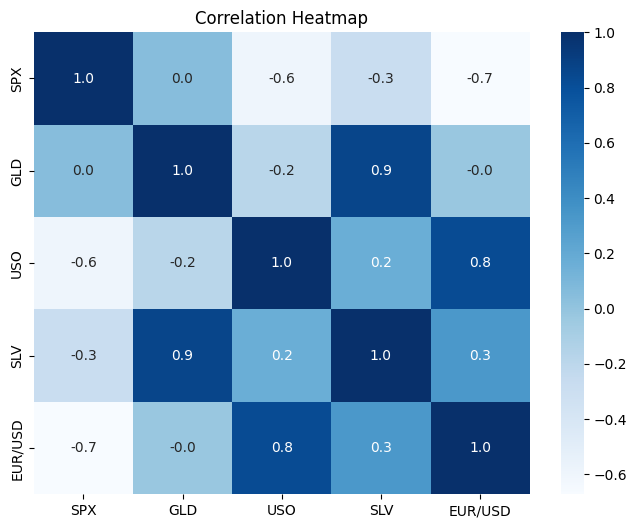

In [18]:
#create a heatmap from the correlation values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-25f872274bb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

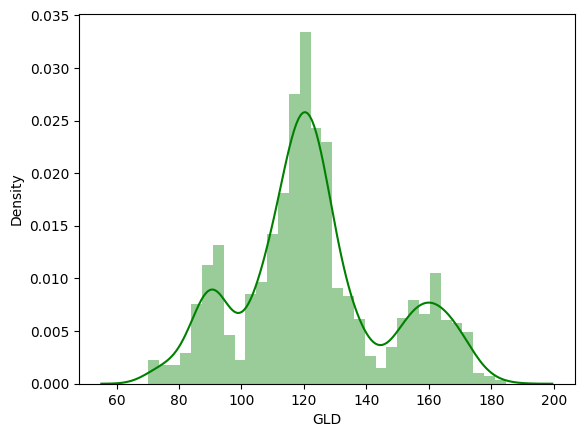

In [22]:
# distribution of gold values
sns.distplot(gold_data['GLD'],color='green')

Spliting the features and target

In [23]:
#drop the date and gold columns
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [24]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
#split into test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [26]:
print(X_train.shape, X_train.shape, X_test.shape)

(1832, 4) (1832, 4) (458, 4)


Model with RandomForestRegressor

In [29]:
#loading the model
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
#train the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [33]:
#Prediction on Test Data
test_golddata_prediction = regressor.predict(X_test)

In [35]:
print(test_golddata_prediction)

[168.4763991   82.26369968 116.1404004  127.58930095 120.62120141
 154.68229765 149.97749831 126.10350074 117.36709875 126.06720076
 116.82950131 171.31460067 142.15659839 167.84879862 115.28319989
 117.57890041 136.98010314 170.14720075 159.97200266 158.47399982
 155.06960029 125.17370018 175.89229993 157.18320391 125.21270056
  93.7192996   77.16690038 120.55459992 119.11189957 167.37879974
  88.17570052 125.1995001   91.07770055 117.5368002  121.15779894
 136.26100103 115.59080114 115.08350087 146.95879962 107.21740122
 104.24600239  87.23879784 126.47000057 117.66439994 153.02189945
 119.62010013 108.28630017 108.12049778  93.1801003  127.03539786
  74.85150038 113.51749974 121.24400037 111.36299911 118.96559904
 120.53869932 158.78580072 167.21980193 146.92729641  85.91679887
  94.35860051  86.71159886  90.43140009 118.92050077 126.32430055
 127.70840006 169.22169968 122.13989936 117.25509911  98.42010043
 167.85360094 142.95879935 131.9345019  121.25490204 120.72559943
 119.66310

In [36]:
#r squared error
r_score = metrics.r2_score(Y_test, test_golddata_prediction)
print("R squared error : ", r_score)

#mean absolute error
m_score = metrics.mean_absolute_error(Y_test, test_golddata_prediction)
print("Mean Absolute Error : ", m_score)

R squared error :  0.9893510539977668
Mean Absolute Error :  1.3213623551965015


Compare actuals and predictions

In [39]:
#convert y_test to list
Y_test = list(Y_test)

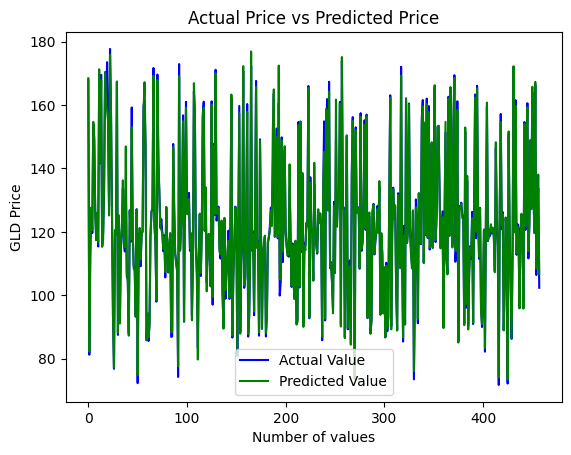

In [42]:
#compare the actual values and the predicted values in scattered plots in different colors
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_golddata_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()